# Plots and code snippets for Durack et al., CMIP Summary paper

<div style="text-align: right">
<p>
    <img src="https://pcmdi.github.io/assets/PCMDI/199x65px-PCMDI-Logo-Text-rectangle.png"
         width="91"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Program for Climate Model Diagnosis and Intercomparison"
         alt="Program for Climate Model Diagnosis and Intercomparison"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/LLNL/212px-LLNLiconPMS286-WHITEBACKGROUND.png"
         width="30"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Lawrence Livermore National Laboratory"
         alt="Lawrence Livermore National Laboratory"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/DOE/459x127px-DOE-Logo_Color_TextOnly.png"
         width="108"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="United States Department of Energy"
         alt="United States Department of Energy"
    >
</p>
</div>

**Summary**

The CMIP Summary paper aims to...

**Authors**

Paul J. Durack ([durack1](https://github.com/durack1); [PCMDI](https://pcmdi.llnl.gov/), [Lawrence Livermore National Laboratory](https://www.llnl.gov/))

**Reference**

Durack, P. J., K. E. Taylor, P. J. Gleckler et al. (2025): The Coupled Model Intercomparison Project (CMIP): Reviewing project history, evolution, and future, GMD [in prep.]

**Notes**

PJD 15 Nov 2024 - Initial start, Figs 1, 5 and 6 updated<br>
PJD 15 Nov 2024 - Added Fig A1

**Links**

[Embedding SVG graphics into TeX](https://medium.com/@aaron_imn/a-quick-guide-to-use-scalable-vector-graphics-svg-on-overleaf-ca69448f7177)<br> 
[Embedding SVGZ graphics into Overleaf](https://tex.stackexchange.com/questions/440062/how-to-use-svgz-with-includesvg)<br>
[Table markdown in jupyter](https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter)<br>
[Prevent figure label overlap: matplotlib](https://www.google.com/search?q=matplotlib+ax.barh+prevent+label+overlap)

**Notebook lookup table**

Note: Links to the sections work best when viewing this notebook via [nbviewer](https://nbviewer.org/github/durack1/CMIPSummary/blob/main/figuresAndTables.ipynb).

1. [Figure 1: Experiments, models, institutions and countries](figuresAndTables.ipynb#fig1)
1. [Figure 2: CMIP6 project growth over time](figuresAndTables.ipynb#fig2)
1. [Figure 3: Web of Science (WoS) citations for MIP overview papers](figuresAndTables.ipynb#fig3)
1. [Figure 4: Web of Science (WoS) citations for CMIP6 Community MIP papers](figuresAndTables.ipynb#fig4)
1. [Figure 5: Recorded downloads by experiment across three phases of CMIP](figuresAndTables.ipynb#fig5)
1. [Figure 6: A time history of MIPs and their broader impact](figuresAndTables.ipynb#fig6)
1. [Figure A1: Recorded downloads by MIP across three phases of CMIP](figuresAndTables.ipynb#figA1)

### imports

In [1]:
%%time
import matplotlib.pyplot as plt
import numpy as np
import copy
import datetime
import os

CPU times: user 239 ms, sys: 62.5 ms, total: 301 ms
Wall time: 437 ms


### define time

In [2]:
%%time
timeNow = datetime.datetime.now()
timeFormat = timeNow.strftime("%y%m%dT%H%M%S")
print("timeFormat:", timeFormat)

timeFormat: 241115T231807
CPU times: user 226 μs, sys: 187 μs, total: 413 μs
Wall time: 278 μs


### Figure 1: Experiments, models, institutions and countries <a class="anchor" id="fig1"></a>

### define input data

In [3]:
%%time
labels = ["AMIP1", "AMIP2", "CMIP1", "CMIP2", "CMIP3", "CMIP5", "CMIP6"]
experiments = [1, 1, 1, 2, 12, 37, 322]  # CMIP6 values pulled from https://github.com/WCRP-CMIP/CMIP6_CVs
models = [29, 32, 20, 17, 24, 59, 132]
institutions = [28, 25, 16, 15, 16, 26, 49]
countries = [9, 9, 8, 8, 11, 12, 26]
#forcingCounts = [2, 2, 0, 1, 15, 24, 63]  # https://docs.google.com/presentation/d/1_51Oohg4unT_W_F2xskYoOB3yIshMwxBBEnD6gIBI7Q/edit?usp=sharing
#forcingCountsBlank = np.empty(7,)
#forcingCountsBlank[:] = np.nan

CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 3.1 μs


### plot

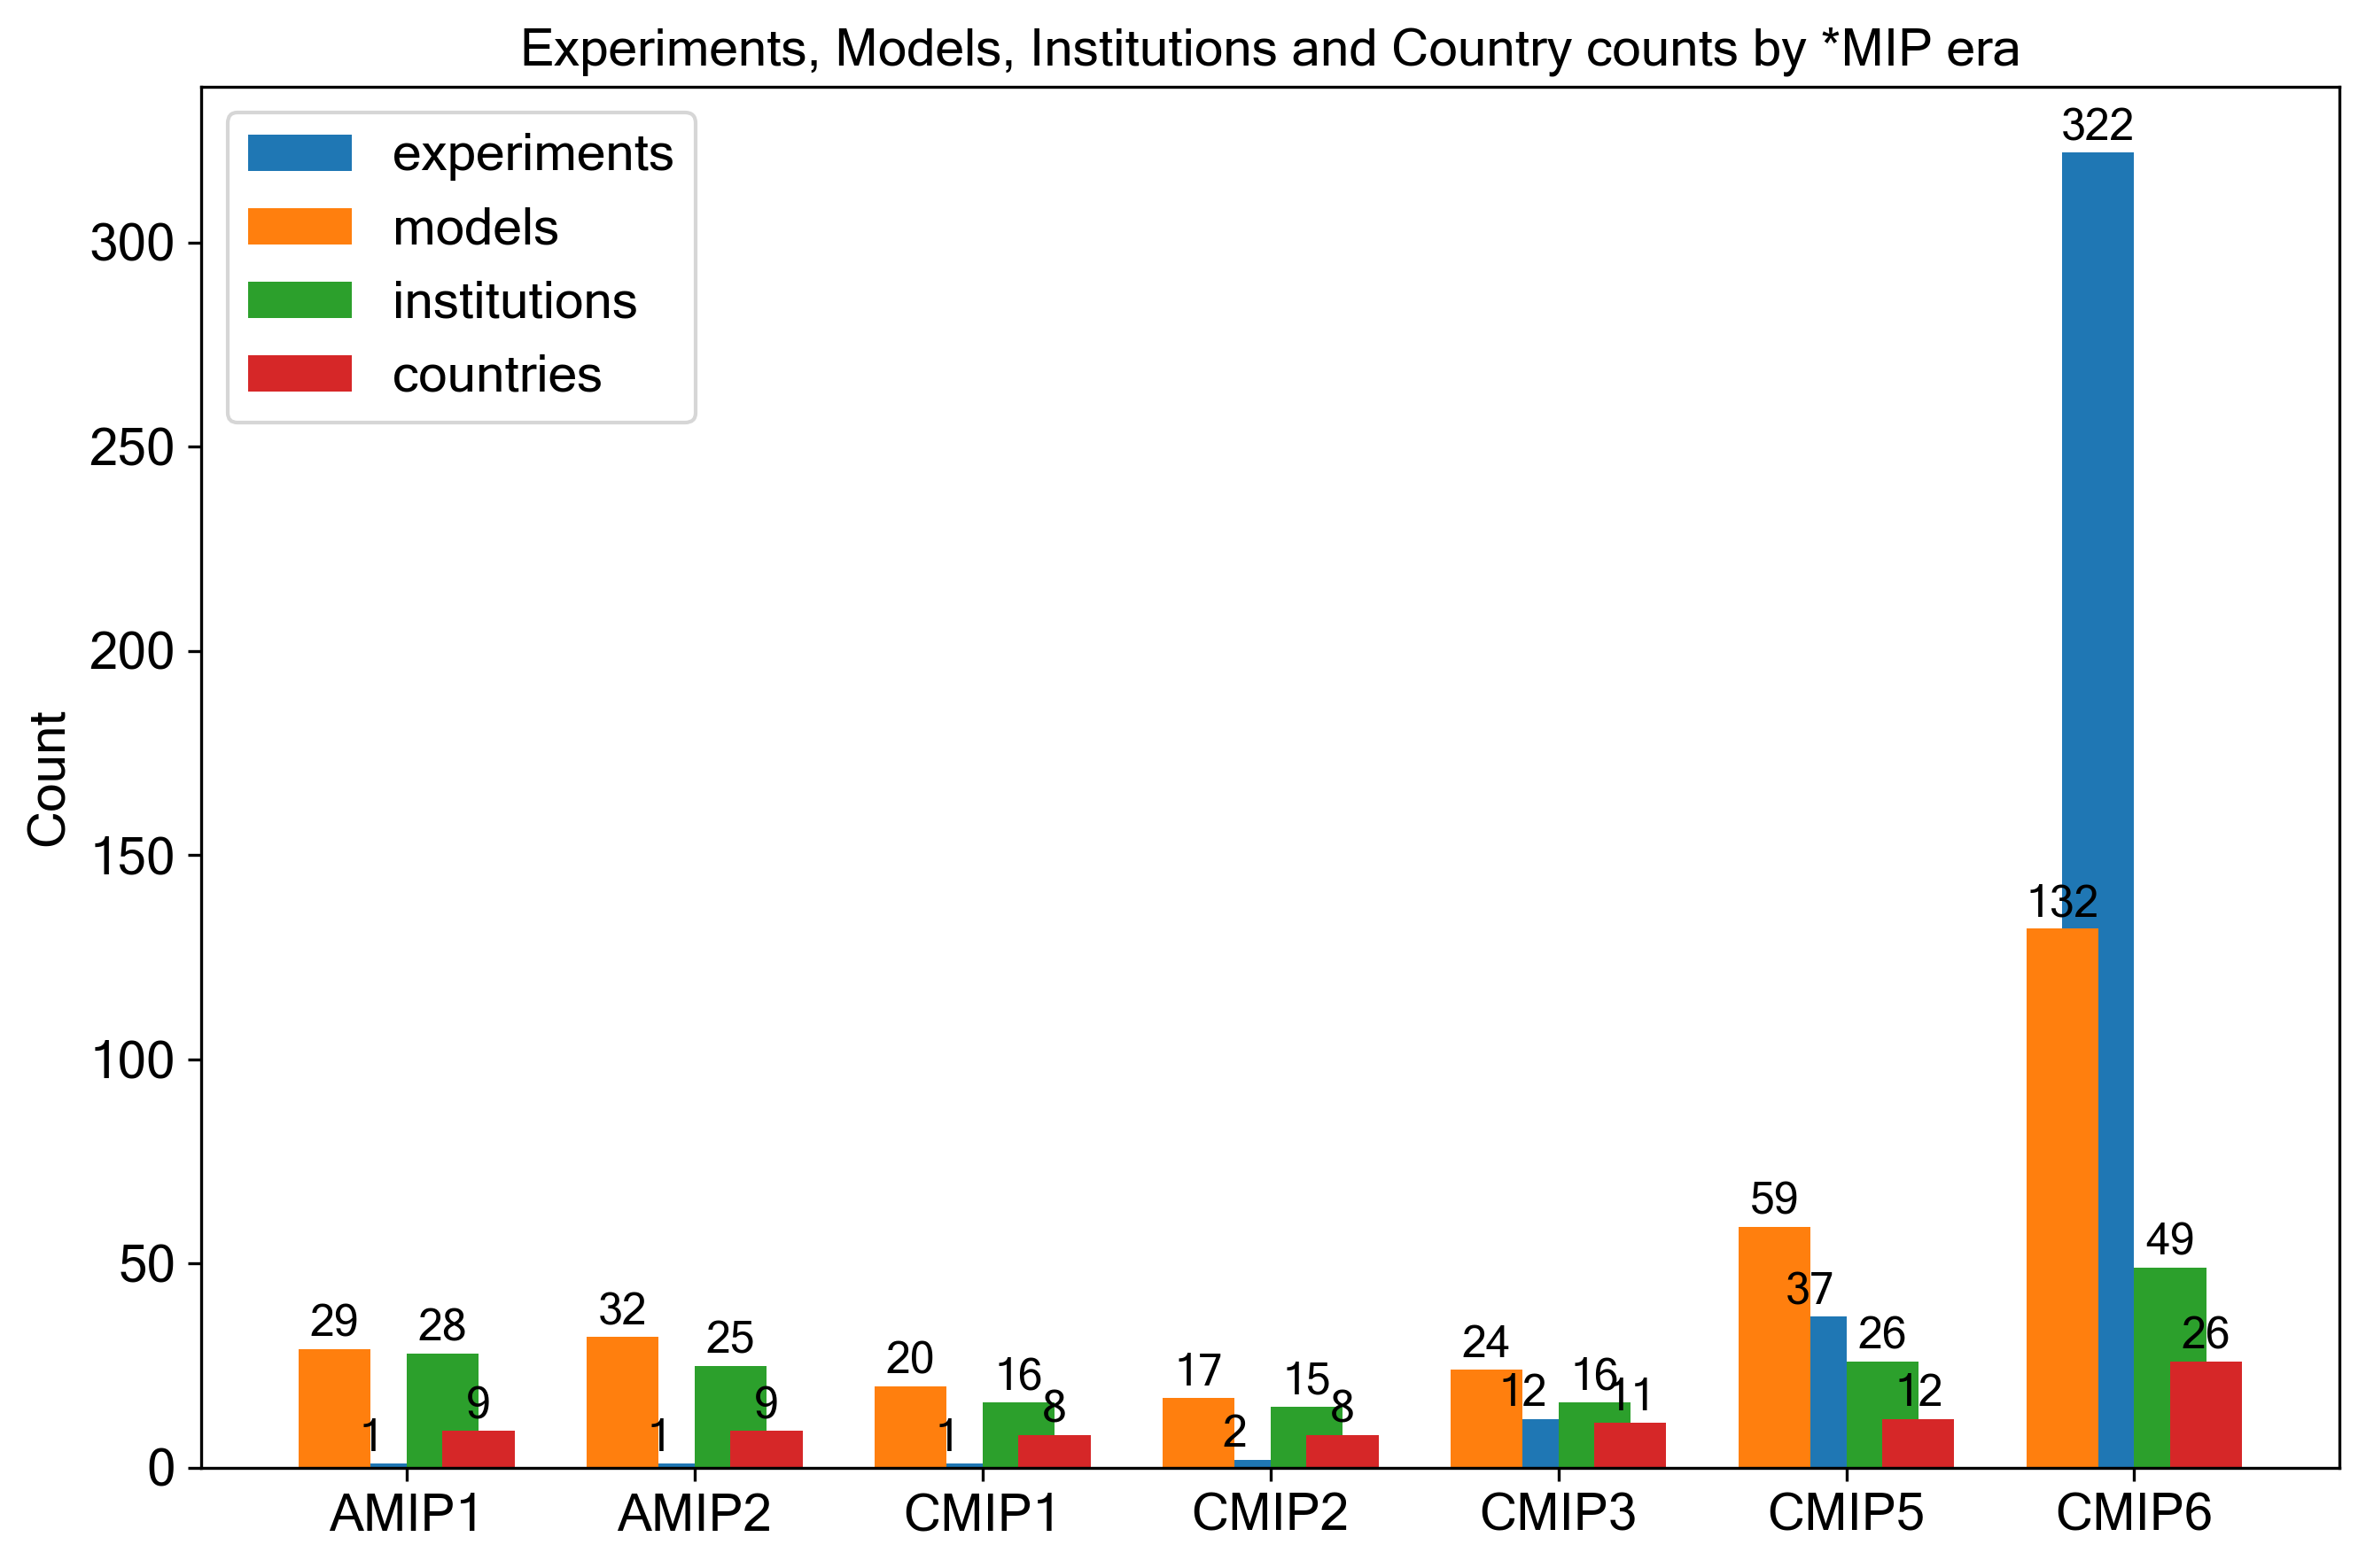

In [4]:
# set inputs
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars
fontName = "Microsoft Sans Serif"
fontSize = 14
offset = 0.5

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot
rects1 = ax.bar(x - width*offset, experiments, width, label="experiments")
rects3 = ax.bar(x - width, models, width, label="models")
rects2 = ax.bar(x + width*offset, institutions, width, label="institutions")
rects4 = ax.bar(x + width, countries, width, label="countries")
#rects5 = ax.bar(x + width*1.5, forcingCountsBlank, width, label="forcings (DECK/historical only - no *MIPs considered)")

# pretty things up - add text for labels, title, custom x-axis tick labels, etc.
ax.set_title('Experiments, Models, Institutions and Country counts by *MIP era',
             fontname=fontName, fontsize=fontSize)
ax.set_ylabel('Count', fontname=fontName, fontsize=fontSize)
plt.yticks(fontname=fontName, fontsize=fontSize)
ax.set_xticks(x, labels, fontname=fontName, fontsize=fontSize)
ax.legend(prop={"family": fontName, "size": fontSize})

# label cleanup
padding = 1
labelSize = 12

ax.bar_label(rects1, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects2, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects3, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects4, padding=padding, fontname=fontName, fontsize=labelSize)
#ax.bar_label(rects5, padding=padding, fontname=fontName, fontsize=labelSize)  # forcing

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat,"Fig1.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 2: CMIP6 project growth over time <a class="anchor" id="fig2"></a>

### pull data

### plot

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 3: Web of Science (WoS) citations for MIP overview papers <a class="anchor" id="fig3"></a>

### pull data

### plot

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 4: Web of Science (WoS) citations for CMIP6 Community MIP papers <a class="anchor" id="fig4"></a>

### pull data

### plot

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 5: Recorded downloads by experiment across three phases of CMIP <a class="anchor" id="fig5"></a>

### tabulate input data

| MIP phase | experiment | MIP id | Download #'s % |
| --- | --- | :---: | :---: |
| CMIP3 | historical (20C3M) | CMIP/DECK | 38.4 |
| CMIP3 | SRESA1B | ScenarioMIP | 20.5 |
| CMIP3 | piControl (picntrl) | CMIP/DECK | 16.8 |
| CMIP3 | SRESB1 | ScenarioMIP | 6.9 |
| CMIP3 | SRESA2 | ScenarioMIP | 6.8 |
| CMIP3 | 1pctCO2 (1pctto2x) | CMIP/DECK | 4.9 |
| CMIP3 | 3 experiment cumulative | ScenarioMIP | 34.2 |
| CMIP3 | other | CMIP/DECK, ScenarioMIP, CFMIP | 5.7 |
| | | | |
| CMIP5 | rcp85 | ScenarioMIP | 29.6 |
| CMIP5 | historical | CMIP/DECK | 25.7 |
| CMIP5 | rcp45 | ScenarioMIP | 10.7 |
| CMIP5 | piControl | CMIP/DECK | 10.5 |
| CMIP5 | decadal1990 | DCPP | 3.4 |
| CMIP5 | rcp26 | ScenarioMIP | 3.0 |
| CMIP5 | historicalMisc | CMIP/DECK | 2.4 |
| CMIP5 | abrupt-4xCO2 (abrupt4xCO2) | CMIP/DECK | 2.0 |
| CMIP5 | 1pctCO2| CMIP/DECK | 1.6 |
| CMIP5 | historicalNat | DAMIP | 1.4 |
| CMIP5 | 4 experiment cumulative | ScenarioMIP | 44.3 |
| CMIP5 | other | CMIP/DECK, DCPP, DAMIP, PMIP, C4MIP, CFMIP, RFMIP | 8.7 |
| | | | |
| CMIP6 | historical | CMIP/DECK | 30.5 |
| CMIP6 | piControl | CMIP/DECK | 12.6 |
| CMIP6 | ssp245 | ScenarioMIP | 9.1 |
| CMIP6 | ssp585 | ScenarioMIP | 8.9 |
| CMIP6 | ssp370 | ScenarioMIP | 5.6 |
| CMIP6 | ssp126 | ScenarioMIP | 5.6 |
| CMIP6 | dcppA-hindcast | DCPP | 5.4 |
| CMIP6 | abrupt-4xco2 | CMIP/DECK | 2.2 |
| CMIP6 | 1pctCO2 | CMIP/DECK | 2.2 |
| CMIP6 | ssp119 | ScenarioMIP | 2.1 |
| CMIP6 | hist-1950 | HighResMIP | 1.7 |
| CMIP6 | ssp434 | ScenarioMIP | 1.1 |
| CMIP6 | highresSST-present | HighResMIP | 1.1 |
| CMIP6 | amip | CMIP/DECK | 1.1 |
| CMIP6 | ssp460 | ScenarioMIP | 0.8 |
| CMIP6 | control-1950 | HighResMIP | 0.7 |
| CMIP6 | 7 experiment cumulative | ScenarioMIP | 33.0 |
| CMIP6 | other | CMIP/DECK, ScenarioMIP, DCPP, HighResMIP, PAMIP, PMIP, DAMIP, C4MIP, AerChemMIP, LUMIP, LS3MIP, RFMIP, OMIP, CFMIP, GeoMIP, FAFMIP, CDRMIP, GMMIP, ISMIP6, VolMIP | 8.9 |

### define input data

In [5]:
# Cutoff >90%
data1 = {
    "CMIP3": [34.2, 38.4, 16.8, 4.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.7],
    "CMIP5": [43.4, 25.7, 10.5, 1.6, 0, 3.4, 2.0, 2.4, 0, 1.4, 0, 0, 0, 9.6],
    "CMIP6": [33.0, 30.5, 12.6, 2.2, 5.4, 0, 2.2, 0, 1.7, 0, 1.1, 1.1, 0.7, 8.9]
}
labels1 = ["ScenarioMIP", "historical", "piControl", "1pctCO2", "dcppA-hindcast", "decadal1990", "abrupt-4xCO2", "historicalMisc", "hist-1950", "historicalNat", "amip", "highressst-present", "control-1950", "other"]
labels_cm3 = ["-historical 38.4", "-ScenarioMIP 34.2", "-piControl 16.8", "-1pctCO2 4.9", "-other 5.7"]
labels_cm5 = ["-ScenarioMIP 43.4", "-historical 25.7", "-piControl 10.5", "-decadal1990 3.4", "-historicalMisc 2.4", "-abrupt-4xCO2 2.0", "-1pctCO2 1.6", "-historicalNat 1.4", "-other 9.6"]
labels_cm6 = ["-ScenarioMIP 33.0", "-historical 30.5", "-piControl 12.6", "-dcppA-hindcast 5.4", "-abrupt-4xCO2 2.2", "-1pctCO2 2.2", "-hist-1950 1.7", "-highressst-present 1.1", "-amip 1.1", "-control-1950 0.7", "-other 8.9"]
# Cutoff <90%, top 6 experiments
data2 = {
    "CMIP3": [34.2, 38.4, 16.8, 0, 4.9, 0, 0, 0, 5.7],
    "CMIP5": [44.3, 25.7, 10.5, 0, 0, 3.4, 2.4, 2.0, 11.7],
    "CMIP6": [33.7, 30.5, 12.6, 5.4, 2.2, 0, 0, 2.2, 13.4]
}
labels2 = ["ScenarioMIP", "historical", "piControl", "dcppA-hindcast", "1pctCO2", "decadal1990", "historicalMisc", "abrupt-4xCO2", "other"]
labels_cm3 = ["-historical 38.4", "-ScenarioMIP 34.2", "piControl 16.8", "-1pctCO2 4.9", "-other 5.7"]  # = 100
labels_cm5 = ["-ScenarioMIP 44.3", "-historical 25.7", "-piControl 10.5", "-decadal1990 3.4", "-historicalMisc 2.4", "-abrupt-4xCO2 2.0", "-other 11.7"] # = 100
labels_cm6 = ["-ScenarioMIP 33.7", "-historical 30.5", "-piControl 12.6", "-dcppA-hindcast 5.4", "-abrupt-4xCO2 2.2", "-1pctCO2 2.2", "-other 13.4"]  # = 100

### plot

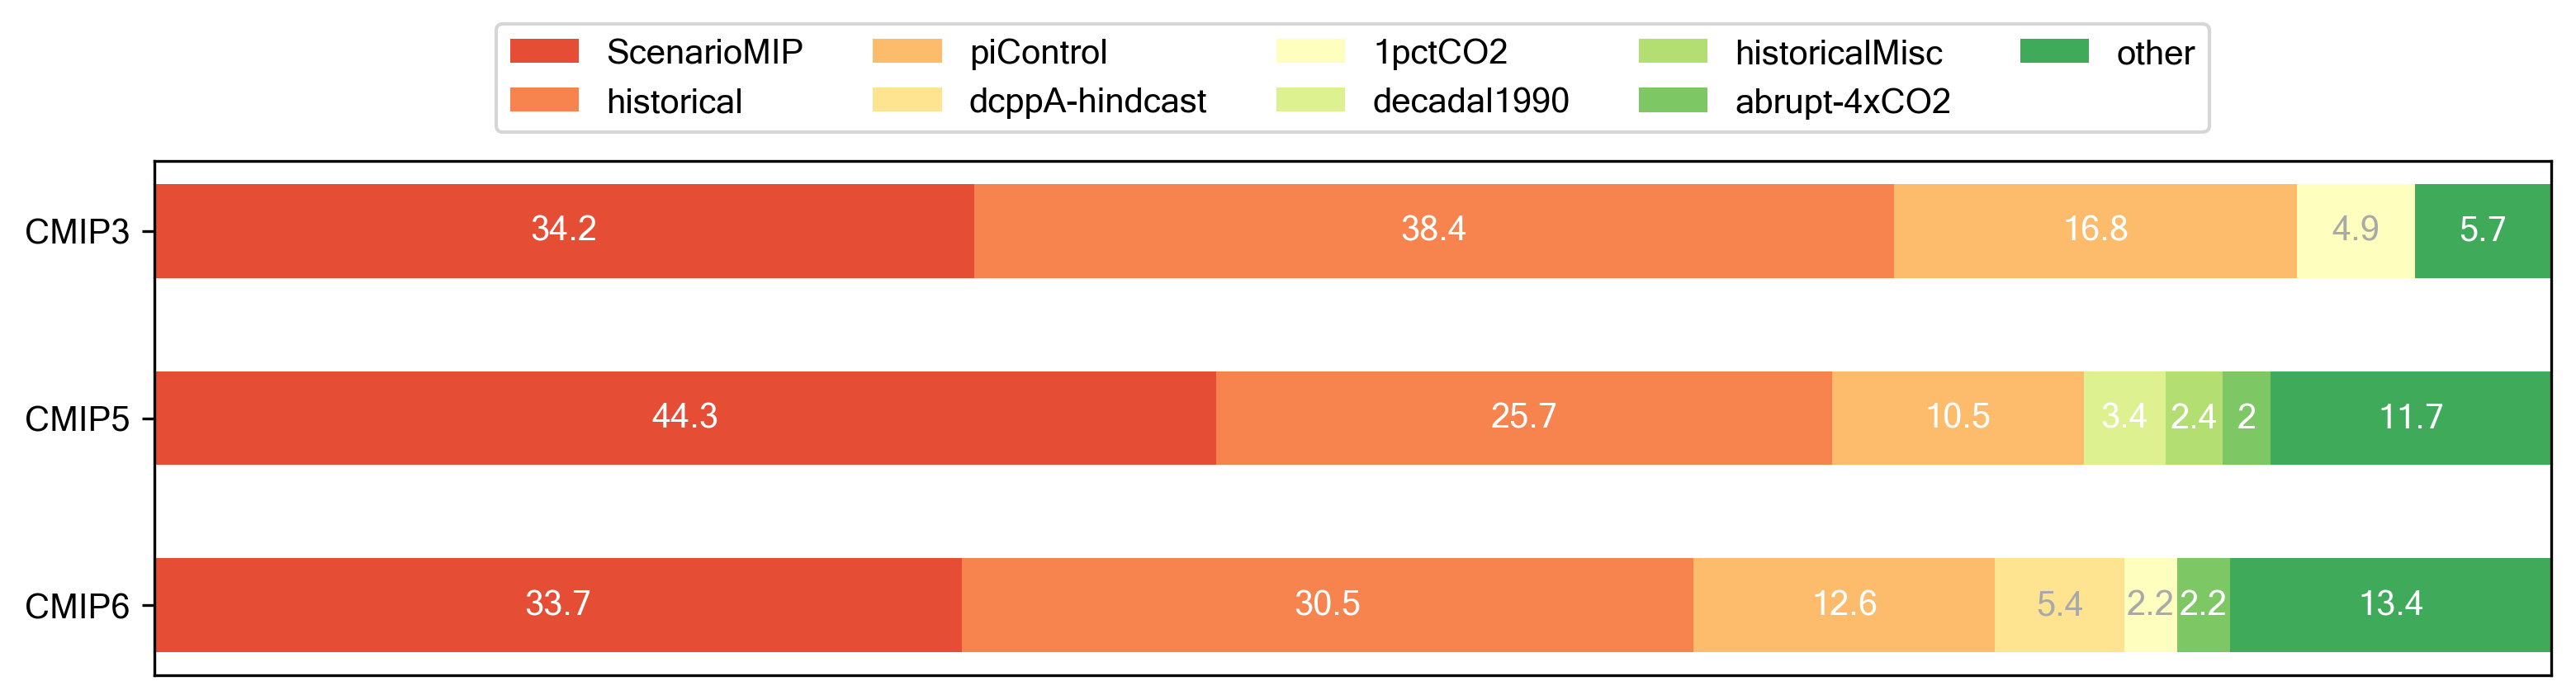

In [6]:
fontName = "Microsoft Sans Serif"
fontSize = 10
dataKeys = list(data2.keys())
dataNp = np.array(list(data2.values()))
dataCumul = dataNp.cumsum(axis=1)
labelColours = plt.colormaps['RdYlGn'](
    np.linspace(0.15, 0.85, dataNp.shape[1]))

fig, ax = plt.subplots(figsize=(10.5, 3), dpi=300) # 8.5 x 11 inches US letter
ax.invert_yaxis()
ax.xaxis.set_visible(False)
plt.yticks(fontname=fontName)
ax.set_xlim(0, np.sum(dataNp, axis=1).max())

for i, (colname, color) in enumerate(zip(labels2, labelColours)):
    widths = dataNp[:, i]
    starts = dataCumul[:, i] - widths
    rects = ax.barh(dataKeys, widths, left=starts, height=0.5,
                    label=colname, color=color)
    # remove 0 labels
    tmp = copy.deepcopy(rects.datavalues)
    tmp[tmp == 0] = np.nan
    rects.datavalues = tmp
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.bar_label(rects, label_type='center', color=text_color, fontname=fontName)
    
ax.legend(ncols=5, bbox_to_anchor=(0.5, 1.3),
          loc='upper center', prop={"family": fontName, "size": fontSize})  # fontsize='small', 

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat,"Fig5.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 6: A time history of MIPs and their broader impact <a class="anchor" id="fig6"></a>¶

![title](241115_durack1-AMIP-CMIP-IPCC-Impact-trim-large.png)

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure A1: Recorded downloads by MIP across three phases of CMIP <a class="anchor" id="figA1"></a>

### tabulate input data

| MIP phase | experiment/experiment count | MIP id | Download #'s % |
| --- | --- | :---: | :---: |
| CMIP3 | historical (20C3M) | CMIP/DECK | 38.4 |
| CMIP3 | SRESA1B | ScenarioMIP | 20.5 |
| CMIP3 | piControl (picntrl) | CMIP/DECK | 16.8 |
| CMIP3 | SRESB1 | ScenarioMIP | 6.9 |
| CMIP3 | SRESA2 | ScenarioMIP | 6.8 |
| CMIP3 | 1pctCO2 (1pctto2x) | CMIP/DECK | 4.9 |
| CMIP3 | 1pctCO2 (1pctto4x) | CMIP/DECK | 2.2 |
| CMIP3 | commit | ScenarioMIP | 1.1 |
| CMIP3 | amip | CMIP/DECK | 0.8 |
| CMIP3 | pdcntrl | CMIP/DECK | 0.7 |
| CMIP3 | 2xco2 | CFMIP | 0.4 |
| CMIP3 | slabcntl | CFMIP | 0.4 |
| CMIP3 | 3 experiment cumulative | ScenarioMIP | 34.2 |
| CMIP3 | other (excluding top 6 experiments) | CMIP/DECK, ScenarioMIP, CFMIP | 5.7 |
| | | | |
| CMIP5 | 4 | ScenarioMIP | 44.3 |
| CMIP5 | 5 | CMIP/DECK | 40.9 |
| CMIP5 | 65 | DCPP | 6.4 |
| CMIP5 | 4 | DAMIP | 5.3 |
| CMIP5 | 3 | PMIP | 1.8 |
| CMIP5 | 7 | C4MIP | 0.8 |
| CMIP5 | 9 | CFMIP | 0.3 |
| CMIP5 | 4 | RFMIP | 0.3 |
| CMIP5 | other (excluding top 4 MIPs) | PMIP, C4MIP, CFMIP, RFMIP | 3.1 |
| | | | |
| CMIP6 | 9 | CMIP/DECK | 49.2 |
| CMIP6 | 8 | ScenarioMIP | 33.7 |
| CMIP6 | 23 | DCPP | 6.0 |
| CMIP6 | 6 | HighResMIP | 4.5 |
| CMIP6 | 21 | PAMIP | 1.6 |
| CMIP6 | 6 | PMIP | 1.0 |
| CMIP6 | 15 | DAMIP | 1.0 |
| CMIP6 | 12 | C4MIP | 0.8 |
| CMIP6 | 38 | AerChemMIP | 0.7 |
| CMIP6 | 18 | LUMIP | 0.4 |
| CMIP6 | 7 | LS3MIP | 0.4 |
| CMIP6 | 15 | RFMIP | 0.3 |
| CMIP6 | 2 | OMIP | 0.2 |
| CMIP6 | 24 | CFMIP | 0.1 |
| CMIP6 | 4 | GeoMIP | 0.1 |
| CMIP6 | 8 | FAFMIP | 0.1 |
| CMIP6 | 5 | CDRMIP | 0.0 |
| CMIP6 | 6 | GMMIP | 0.0 |
| CMIP6 | 5 | ISMIP6 | 0.0 |
| CMIP6 | 2 | VolMIP | 0.0 |
| CMIP6 | other (excluding top 4 MIPs) | PAMIP, DAMIP, C4MIP, AerChemMIP, LUMIP, LS3MIP, RFMIP, OMIP, CFMIP, GeoMIP, FAFMIP, CDRMIP, GMMIP, ISMIP6, VolMIP | 6.6 |

### define input data

In [7]:
# Cutoff >=4.5%
data1 = {
    "CMIP3": [38.4, 20.5, 16.8, 6.9, 6.8, 4.9, 5.7],  # = 100
    "CMIP5": [44.3, 40.9, 6.4, 5.3, 3.1],  # = 100
    "CMIP6": [49.2, 33.7, 6.0, 4.5, 6.6]  # = 100
}
labelsCm3 = ["historical 38.4%", "SRESA1B 20.5%", "piControl 16.8%", " SRESB1 6.9%", "SRESA2 6.8%", "1pctCO2 4.9%", "other 5.7%"]
labelsCm5 = ["ScenarioMIP 44.3%", "CMIP/DECK 40.9%", "DCPP 6.4%", "DAMIP 5.3%", "other 3.1%"]
labelsCm6 = ["CMIP/DECK 49.2%", "ScenarioMIP 33.7%", "DCPP 6.0%", "HighResMIP 4.5%", "other 6.6%"]

### plot

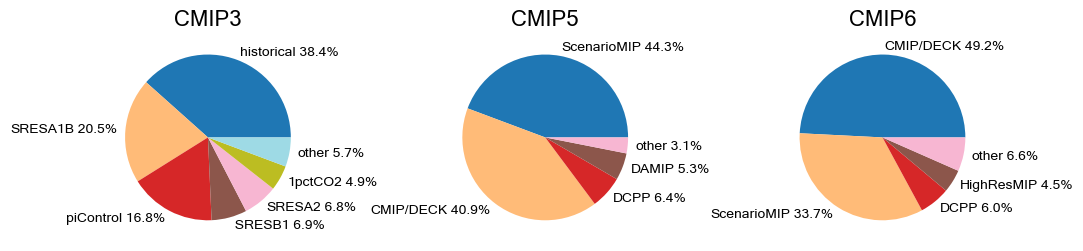

In [8]:
# Set fonts and sizes
fontName = "Microsoft Sans Serif"
fontSize = 16
# select colourmap
cmap = plt.get_cmap('tab20')

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(10.75, 3))

# Plot the first pie chart
axes[0].pie(data1["CMIP3"], labels=labelsCm3, textprops={'fontname': fontName}, colors=cmap(np.linspace(0, 1, len(data1["CMIP3"]))))  #, autopct='%1.1f%%')
axes[0].set_title('CMIP3', fontname=fontName, fontsize=fontSize)

# Plot the second pie chart
axes[1].pie(data1["CMIP5"], labels=labelsCm5, textprops={'fontname': fontName}, colors=cmap(np.linspace(0, 1, len(data1["CMIP3"]))))
axes[1].set_title('CMIP5', fontname=fontName, fontsize=fontSize)

# Plot the third pie chart
axes[2].pie(data1["CMIP6"], labels=labelsCm6, textprops={'fontname': fontName}, colors=cmap(np.linspace(0, 1, len(data1["CMIP3"]))))
axes[2].set_title('CMIP6', fontname=fontName, fontsize=fontSize)

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat,"FigA1.svg"]), format="svg")